# DBSCAN


Comenzaremos cargando los mismos datasets sintéticos que cargamos en la clase de KMEANS


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLine, labelLines
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs, make_moons

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

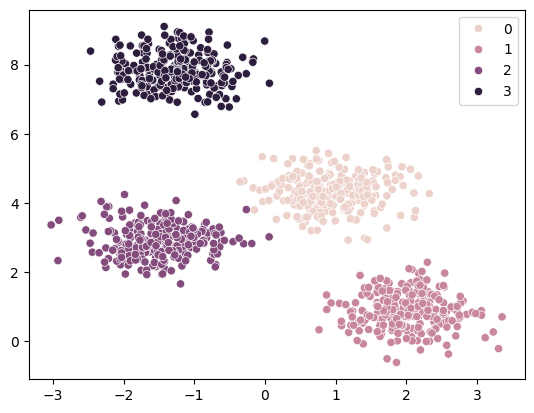

In [3]:
sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1)
plt.show()

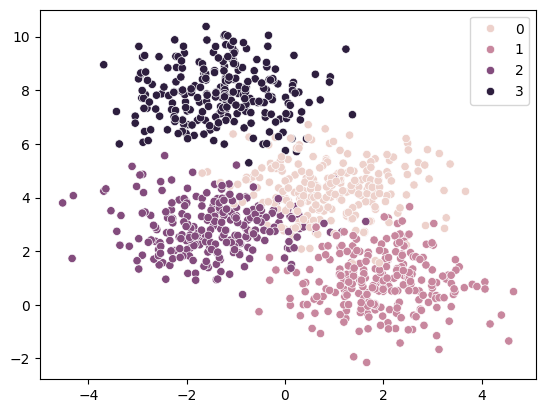

In [4]:
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.show()

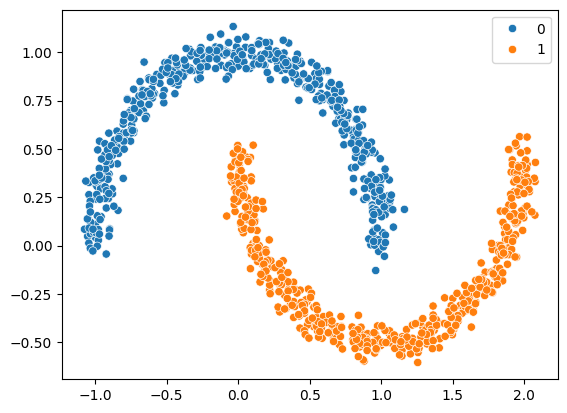

In [5]:
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3)
plt.show()

Ahora deben importar DBSCAN (de sklearn) y definir 3 modelos. Cada uno con su propio valor de eps y min_samples.

Para el modelo 1: epsilon de 0.3 y min_samples 10

Para el modelo 2: epsilon de 0.4 y min samples 9

Para el modelo 3: epsilon de 0.2 y min_samples 10

In [6]:
from sklearn.cluster import DBSCAN

db_1 = DBSCAN(eps=0.4, min_samples=10)
db_2 = DBSCAN(eps=0.35, min_samples=9)
db_3 = DBSCAN(eps=0.2, min_samples=10)

Al igual que KMEANS, ahora debemos entrenar cada uno de los modelos

In [7]:
db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(eps=0.2, min_samples=10)

Podemos consultar las etiquetas asignadas luego de entrenar en la variable labels_. Notemos que cuando el label sea igual a '-1' quiere decir que esa instancia fue considerada ruido.

In [8]:
labels_1 = db_1.labels_

In [9]:
labels_1

array([ 0,  1,  0,  2,  3,  1,  1, -1,  1,  1,  0,  3,  2,  0,  3,  2,  2,
        0,  1,  3,  1,  0,  3,  3,  3,  2,  3,  3,  3,  2,  3,  1,  0,  2,
        0,  1,  0,  1,  2,  2,  1,  1,  1,  2,  0,  1,  1,  0,  2,  1,  3,
        1,  1,  2,  0,  3,  1,  1,  0,  0,  3,  3,  2,  2,  2,  0,  1,  2,
        0,  0,  0,  0,  0,  2,  1,  0,  1,  0,  2,  3,  1,  1,  1,  2,  3,
        1,  1,  1,  2,  2,  0,  2,  2,  0,  0,  0,  2,  2,  1,  1,  3,  2,
        1,  3,  1,  2,  1,  0,  2,  3,  1,  1,  2,  0,  2,  2,  1,  2,  3,
        3,  3,  0,  2,  2,  1,  3,  1,  0,  2,  3,  3,  1,  2,  1,  1,  1,
        2,  1,  3,  0,  3,  0,  3,  1,  0,  0,  3,  1,  0,  0,  3,  1,  1,
        1,  2, -1,  1,  1,  3,  2,  0,  3,  1,  1,  1,  1,  0,  0,  1,  3,
        2,  3,  3,  3,  2,  3,  2,  3,  3,  1,  2,  1,  2,  1,  1,  2,  3,
        2,  3,  0,  2,  1,  3,  3,  2,  0,  2,  0,  2,  2,  2,  1,  0,  0,
        3,  3,  2,  1,  0,  1,  0,  2,  1,  0,  2,  1,  1, -1,  3,  0,  1,
        1,  1,  0,  1,  1

In [10]:
np.unique(labels_1)

array([-1,  0,  1,  2,  3], dtype=int64)

In [11]:
labels_2 = db_2.labels_
labels_3 = db_3.labels_

print(f"Clusters en dataset 2: {np.unique(labels_2)}\nClusters en dataset 3: {np.unique(labels_3)}")

Clusters en dataset 2: [-1  0  1  2  3  4  5  6  7]
Clusters en dataset 3: [0 1]


La siguiente función plotea los resultados de manera tal que colorea con distintos colores los distintos clusters, en gris los datos que se consideran Noise y ademas en tamaño mas grande las instancias que son CORES. No hace falta que cambien nada de esta función.

In [12]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title(f"Número de clusters: {n_clusters_1}")
    plt.show()
    return

Ploteamos el resultado para el primer caso. Les parece adecuado el resultado? Pruebe que pasa si modifica los parámetros de epsilon y min_dist.

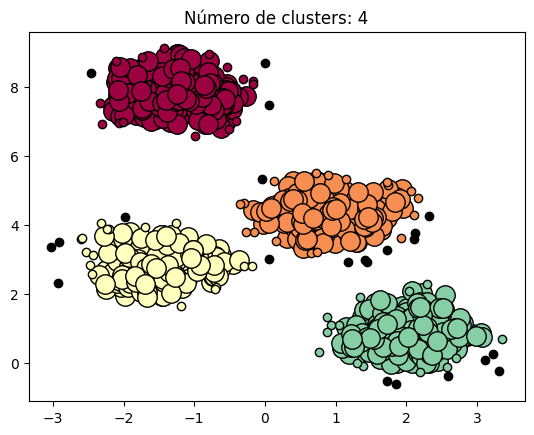

In [13]:
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0) #Obtenemos el número de clusters descartando los -1 (noise)
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

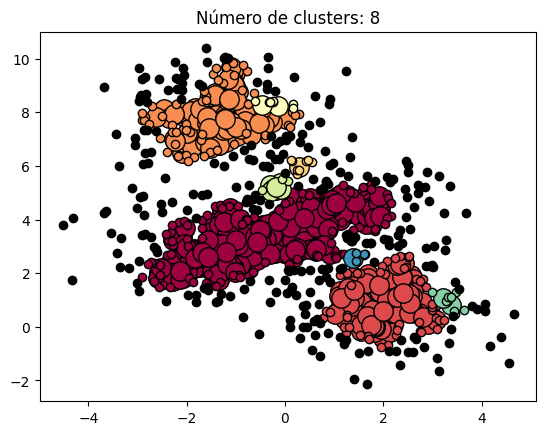

In [14]:
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0)
plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

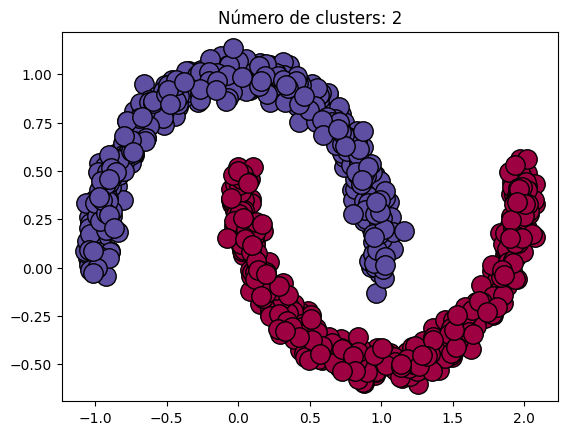

In [15]:
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
plot_DBSCAN(X3,labels_3,db_3,n_clusters_3)

# Desafío

Al igual que con KMEANS, segmentar el siguiente dataset y comparar los resultados obtenidos con los de KMEANS

In [16]:
X_df=pd.read_csv('k-means-desafio.csv')
X_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,...,Edu_Basic,Edu_Graduation,Edu_Master,Edu_PhD,MS_Alone,MS_Divorced,MS_Married,MS_Single,MS_Together,MS_Widow
0,0.234515,-0.824288,-0.92886,0.309300,0.977586,1.550693,1.689878,2.465495,1.483638,1.428812,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.233840,1.038148,0.90892,-0.381922,-0.871112,-0.636731,-0.717674,-0.651121,-0.634018,-1.124711,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.769624,-0.824288,-0.92886,-0.796656,0.358390,0.570123,-0.178204,1.347180,-0.147201,1.428812,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.016073,1.038148,-0.92886,-0.796656,-0.871112,-0.561303,-0.655256,-0.504457,-0.585336,-0.759922,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.240670,1.038148,-0.92886,1.553500,-0.391162,0.419267,-0.218330,0.155532,-0.001155,0.334445,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
X=X_df.values
display(X[0:3,:])

array([[ 0.23451454, -0.82428815, -0.92885982,  0.3093001 ,  0.97758551,
         1.55069309,  1.68987776,  2.46549499,  1.4836377 ,  1.42881227,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [-0.23384031,  1.03814841,  0.90892007, -0.38192219, -0.87111203,
        -0.63673146, -0.7176741 , -0.65112115, -0.63401806, -1.12471142,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.76962405, -0.82428815, -0.92885982, -0.79665557,  0.35839034,
         0.57012347, -0.17820415,  1.34717979, -0.14720065,  1.42881227,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ]])

In [18]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
db.fit(X)

DBSCAN()

In [19]:
y=db.labels_
labels=np.unique(y)
labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17], dtype=int64)

In [20]:
from sklearn.metrics import silhouette_score

# Calcular la silueta
silhouette_db = silhouette_score(X,y)

# Calcular la dispersión media dentro del clúster
# inertia_db = db.inertia_

display(silhouette_db)
# display(inertia_db)

-0.18915979813338984

In [27]:
# Clustering con DBSCAN
def db_silhouette(X,db,eps,min_samples):
    db_scores = []
    nclusters=[]
    eps2=[]
    min_samples2=[]
    for ep in eps:
        for min_sample in min_samples:
            db = DBSCAN(eps=ep, min_samples=min_sample)
            db.fit(X)
            if len(set(db.labels_)) > 1:  # Para evitar errores si solo encuentra un cluster
                db_scores.append(silhouette_score(X, db.labels_))
                nclusters.append(len(set(db.labels_)))
                eps2.append(ep)
                min_samples2.append(min_sample)
    return db_scores,nclusters,eps2,min_samples2

In [32]:
eps_values = [0.1,0.2,0.30,0.4, 0.5,0.6, 0.7,0.8,0.9,1.]
min_samples_values = [2,3,4,5, 6, 7,8,9,10,15,20]

In [33]:
db_scores,nclusters,eps2,min_samples2=db_silhouette(X,db,eps_values,min_samples_values)

In [41]:
import sys
z=list(zip(db_scores,nclusters,eps2,min_samples2))
z[0:3]

[(-0.33394851258884506, 193, 0.1, 2),
 (-0.392988611438293, 9, 0.1, 3),
 (-0.3063108131564603, 212, 0.2, 2)]

In [39]:
len(db_scores)

80

In [31]:
len(nclusters)
# nclusters

80

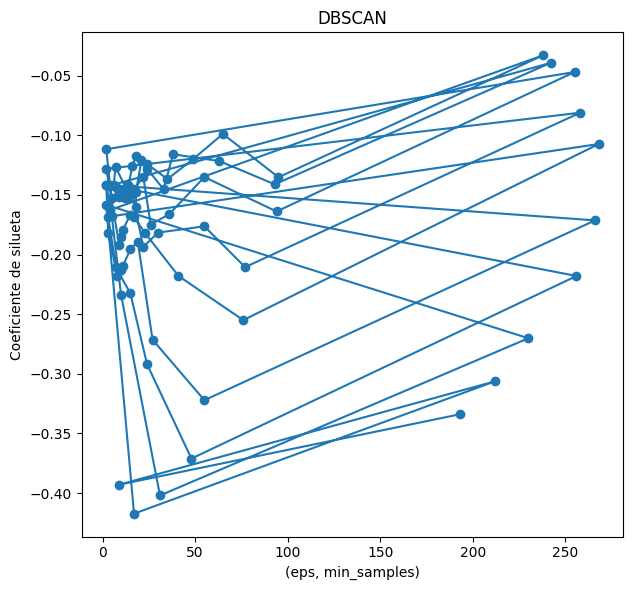

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(nclusters, db_scores, marker='o')
# plt.xticks(range(len(db_scores)), ['({}, {})'.format(eps, min_samples) for eps in eps_values for min_samples in min_samples_values])
plt.xlabel('(eps, min_samples)')
plt.ylabel('Coeficiente de silueta')
plt.title('DBSCAN')

plt.tight_layout()
plt.show()